In [1047]:
# import libs
import sklearn.linear_model as L
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from functools import reduce
import pandas as P
import numpy as N
import matplotlib.pyplot as PP
import re as R
from scipy.stats import pointbiserialr
import seaborn as S



In [1048]:
# helpers
o = lambda f: lambda g: lambda x: f(g(x))
fit = lambda X: lambda Y:  L.LinearRegression().fit(X, Y)
predict = lambda X: lambda R: R.predict(X)
RMSE = lambda Y: lambda P: mean_squared_error(Y, P, squared=False)
get_dummies = lambda X: P.get_dummies(X, drop_first=True)
drop_column = lambda c: lambda X: X.drop(c, axis=1)
split_sample = lambda X, **kwargs1: lambda Y, **kwargs2: train_test_split(X, Y, **{ 'test_size': 0.2, 'random_state': 42, **kwargs1, **kwargs2 })

def predictofit (X, Y, **kwargs):
    X_train, X_test, Y_train, Y_test = split_sample(X)(Y, **kwargs)
    return predict(X_test)(fit(X_train)(Y_train))
def show_RMSE (X, Y, **kwargs):
    print('RMSE: ', RMSE(Y_test)(predictofit(X, Y, **kwargs)))

def tableIO (file):
    table = P.read_csv(file)
    X = table.drop(['median_house_value'], axis=1)
    X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].median())
    Y = table['median_house_value']
    def initialXY():
        return (X.copy(), Y.copy())
    return (table.copy(), initalXY)

plt.style.use('seaborn-dark')

In [1049]:
# initialize environment
table, initalXY = tableIO('housing.csv')

X, Y = initialXY()

In [1050]:
table.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [1051]:
# structure description
print('(rows, columns):', table.shape, '\n')
print('tipo dos dados:\n\n', table.dtypes, '\n' )
print('valores da coluna com valores categoricos "ocean_proximity"', table['ocean_proximity'].unique(), '\n')

(rows, columns): (20640, 10) 

tipo dos dados:

 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object 

valores da coluna com valores categoricos "ocean_proximity" ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND'] 



In [1052]:
# median house value mean groupped by ocean proximity
ocean_proximity_group = table.groupby(['ocean_proximity'])
house_value_mean_by_ocean_proximity = [(k, op['median_house_value'].mean()) for k,op in ocean_proximity_group]

for t in house_value_mean_by_ocean_proximity:
    print(t[0], '\n house value mean: ', t[1], '\n')

<1H OCEAN 
 house value mean:  240084.28546409807 

INLAND 
 house value mean:  124805.39200122119 

ISLAND 
 house value mean:  380440.0 

NEAR BAY 
 house value mean:  259212.31179039303 

NEAR OCEAN 
 house value mean:  249433.97742663656 



In [1053]:
# continuous data correlation with median house value
numeric_columns = table.select_dtypes(['float64', 'int64'])
corr = numeric_columns.loc[:, numeric_columns.columns != 'median_house_value'].corrwith(numeric_columns['median_house_value'])
print(corr.sort_values())

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
dtype: float64


In [1054]:
# correlation with dummies
_X, _Y = initialXY()
_X = get_dummies(_X)
_X.corrwith(_Y)

longitude                    -0.045967
latitude                     -0.144160
housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049454
population                   -0.024650
households                    0.065843
median_income                 0.688075
ocean_proximity_INLAND       -0.484859
ocean_proximity_ISLAND        0.023416
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
dtype: float64

In [1055]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [1056]:
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [1057]:
X.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [1058]:
Y.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [1059]:
# RMSE with every column
_X, _Y = initialXY()
_X = get_dummies(_X)
show_RMSE(_X, _Y)


RMSE:  70031.41991955657


In [1060]:
# RMSE but ocean_proximity
_X, _Y = initialXY()
_X = drop_column(['ocean_proximity'])(_X)
show_RMSE(_X, _Y)

RMSE:  71084.13116794502


In [1061]:
# RMSE: inland

_X, _Y = initialXY()
_X['inland'] = get_dummies(_X)['ocean_proximity_INLAND']
_X = drop_column(['ocean_proximity'])(_X)

show_RMSE(_X, _Y)

RMSE:  70132.85030508868


In [1062]:
# RMSE: inverse inland

_X, _Y = initialXY()
_X['inland'] = N.invert(get_dummies(_X)['ocean_proximity_INLAND'])
_X = drop_column(['ocean_proximity'])(_X)

show_RMSE(_X, _Y)

RMSE:  70132.85030508871


In [1063]:
_X, _Y = initialXY()
_X = get_dummies(_X)
show_RMSE(_X, _Y, random_state=42)

RMSE:  70031.41991955657


In [1064]:
# pointbiserialr
_X, _Y = initialXY()
_X = get_dummies(_X[['ocean_proximity']])

for col in _X.filter(regex="^ocean_proximity"):
    print(col, ':')
    print(pointbiserialr(_X[col], _Y))
    print()


ocean_proximity_INLAND :
PointbiserialrResult(correlation=-0.4848593346486689, pvalue=0.0)

ocean_proximity_ISLAND :
PointbiserialrResult(correlation=0.023416076436869247, pvalue=0.0007672192365138578)

ocean_proximity_NEAR BAY :
PointbiserialrResult(correlation=0.1602844836716687, pvalue=7.939216753126486e-119)

ocean_proximity_NEAR OCEAN :
PointbiserialrResult(correlation=0.14186216979619454, pvalue=3.0374365646384425e-93)



In [1065]:
X, Y = initialXY()
X = X[['median_income']]
show_RMSE(X, Y)


RMSE:  84209.01241414454


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

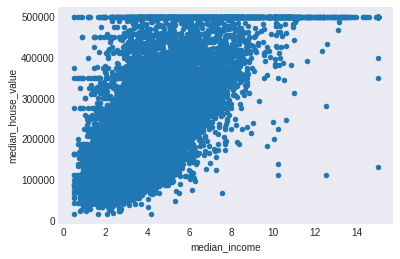

In [1066]:
from sklearn.preprocessing import MinMaxScaler

X, Y = initialXY()
X = get_dummies(X)
clmns = X.columns 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
X = P.DataFrame(X, columns=clmns)

table.plot.scatter("median_income", "median_house_value")

<module 'pandas' from '/nix/store/3a6ardk55mlcynrs7hn4l4vynbm6wp7w-python3-3.9.10-env/lib/python3.9/site-packages/pandas/__init__.py'>

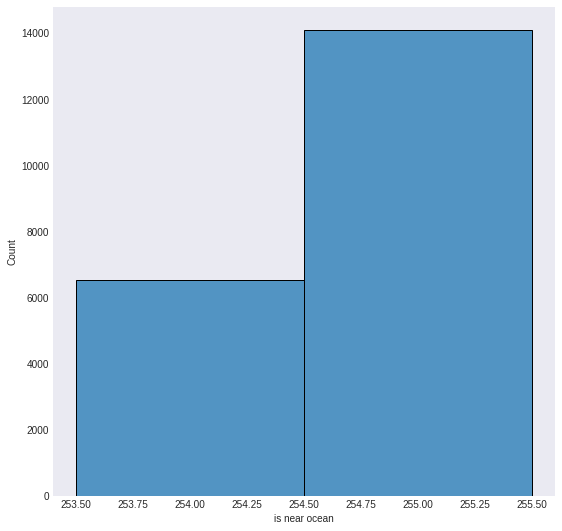

In [1067]:
PP.figure(figsize=(9, 9))

X, Y = initialXY()
X = get_dummies(X)
S.histplot(x=N.invert(X['ocean_proximity_INLAND']), discrete=True ).set_xlabel('is near ocean')
display(P)

<module 'pandas' from '/nix/store/3a6ardk55mlcynrs7hn4l4vynbm6wp7w-python3-3.9.10-env/lib/python3.9/site-packages/pandas/__init__.py'>

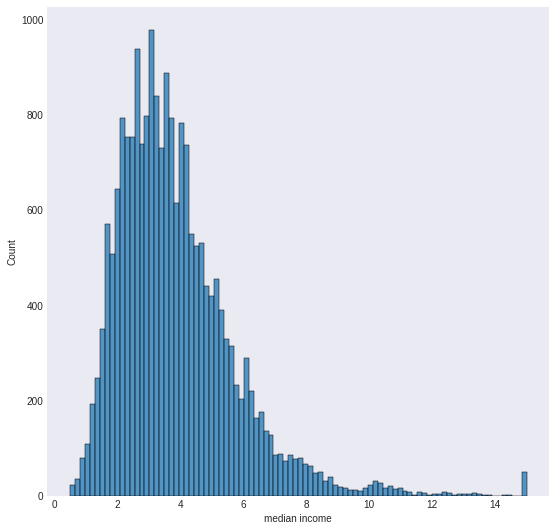

In [1068]:

PP.figure(figsize=(9, 9))

X, Y = initialXY()
S.histplot(x=X['median_income']).set_xlabel('median income')
display(P)

<AxesSubplot:xlabel='median_income'>

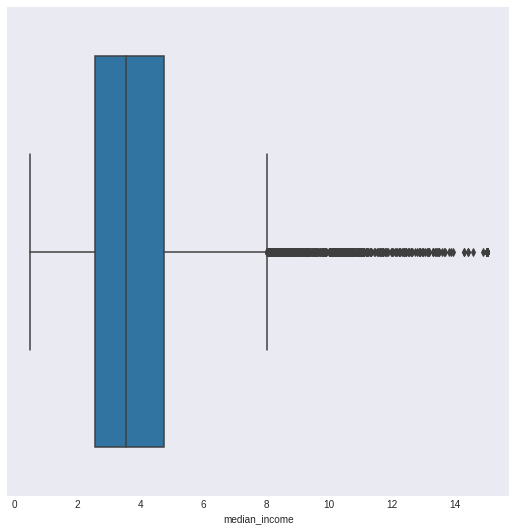

In [1069]:
PP.figure(figsize=(9, 9))

X, Y = initialXY()
S.boxplot(x=X['median_income'])

<Figure size 648x648 with 0 Axes>

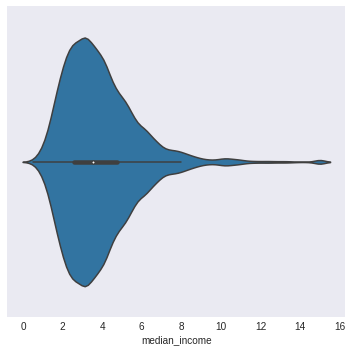

In [1070]:
p = PP.figure(figsize=(9, 9))
X, Y = initialXY()
T = X
T['median_house_value'] = Y

S.catplot(x="median_income", kind="violin", data=T)

In [1119]:
p = PP.figure(figsize=(9, 9))

T = table.copy()
# T = get_dummies(T)
# T = P.DataFrame(MinMaxScaler().fit_transform(T), columns=T.columns)
_T = drop_column(['ocean_proximity'])(T)
_T = P.DataFrame(MinMaxScaler().fit_transform(_T), columns=_T.columns)
_T['ocean_proximity'] = T['ocean_proximity']
_T.sample(10)
# S.catplot(x="median_income", y='median_house_value', hue='ocean_proximity', data=_T)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10968,0.645418,0.130712,1.000000,0.063838,0.055090,0.027327,0.059859,0.522648,0.629484,<1H OCEAN
5957,0.645418,0.168969,0.549020,0.042601,0.063935,0.024384,0.065614,0.180694,0.369691,<1H OCEAN
543,0.206175,0.556854,0.960784,0.037769,0.047331,0.020376,0.053610,0.138895,0.420619,NEAR BAY
17118,0.220120,0.527099,0.882353,0.000712,0.000466,0.000280,0.000658,1.000000,1.000000,NEAR BAY
20621,0.286853,0.687566,0.705882,0.031589,0.038175,0.013481,0.025654,0.128702,0.128868,INLAND
10698,0.657371,0.112646,0.078431,0.125693,0.180478,0.048320,0.155731,0.303451,0.496082,<1H OCEAN
19088,0.180279,0.618491,0.764706,0.069256,0.082247,0.032624,0.075152,0.227376,0.387217,<1H OCEAN
9800,0.242032,0.427205,0.764706,0.053970,0.069522,0.017938,0.055912,0.345961,0.730102,NEAR OCEAN
5930,0.653386,0.166844,0.333333,0.096953,0.111732,0.052636,0.113633,0.273948,0.413609,INLAND
2570,0.020916,0.874601,0.509804,0.077420,0.093731,0.039351,0.093735,0.166508,0.174434,NEAR OCEAN


<Figure size 648x648 with 0 Axes>

In [ ]:
X, Y = initialXY()
X = get_dummies(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
f = fit(X_train)(Y_train)
p = predict(X_test)(f)
X.describe()


In [ ]:
# %%

X, Y = initialXY()
# X = drop_column(['ocean_proximity', 'latitude', 'longitude'])(X)
Y.hist()
# for k in X:
#     X[[k]].hist()
X[['median_income', 'longitude', 'latitude']].hist()

In [ ]:

plt.style.use('seaborn-dark')
x = N.linspace(0, 20, 100)
plt.plot(x, N.sin(x))
plt.show() 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

mpld3.enable_notebook()
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')
N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.set_title("D3 Scatter Plot", size=18);

In [ ]:
# correlação
numeric_columns = table.select_dtypes(['float64', 'int64'])
corr = numeric_columns.loc[:, numeric_columns.columns != 'median_house_value'].corrwith(numeric_columns['median_house_value'])
print(corr.sort_values())

In [1191]:
X, Y = initialXY()
X = P.get_dummies(X, drop_first=True)
X_train, X_test, Y_train, Y_test = split_sample(X)(Y)

L.LinearRegression().fit(X_train, Y_train).score(X_test, Y_test)


0.6257351821159713

119600.0 264725.0
bounds:  482412.5 -98087.5
BEFORE
shape: 0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64
max 500001.0
min 14999.0
AFTER 0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64
shape: 0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64
max 500001.0
min 14999.0


/nix/store/3a6ardk55mlcynrs7hn4l4vynbm6wp7w-python3-3.9.10-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0

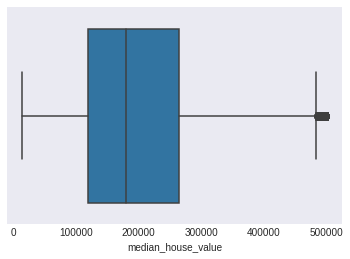

In [1207]:

T = table.copy()
median_income = T['median_house_value'].copy()
Q3 = N.percentile(median_income, 75)
Q2 = N.percentile(median_income, 25)
print(Q2, Q3)
IQR = Q3 - Q2

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q2 - 1.5 * IQR

print('bounds: ', upper_bound, lower_bound)

upper, = N.where(median_income >= upper_bound)
lower, = N.where(median_income <  lower_bound)

print('BEFORE')
print("shape:", median_income)
print("max", median_income.max())
print("min", median_income.min())
# median_income.drop(upper, inplace = True)
# median_income.drop(lower, inplace = True)

T['median_house_value'] = median_income.drop(upper)
T['median_house_value']  = T['median_house_value'].fillna(upper_bound)


T['median_house_value'] = median_income.drop(lower)
T['median_house_value']  = T['median_house_value'].fillna(lower_bound)

print("AFTER", median_income)
print("shape:", median_income)
print("max", median_income.max())
print("min", median_income.min())

S.boxplot(median_income)
N.isnan(T['median_house_value']).sum()


In [1154]:
print(upper)
P.DataFrame(upper)

[   89   140   459 ... 20427 20436 20443]


,0
0,89
1,140
2,459
3,489
4,493
...,...
1066,20422
1067,20426
1068,20427
1069,20436


/nix/store/3a6ardk55mlcynrs7hn4l4vynbm6wp7w-python3-3.9.10-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/nix/store/3a6ardk55mlcynrs7hn4l4vynbm6wp7w-python3-3.9.10-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


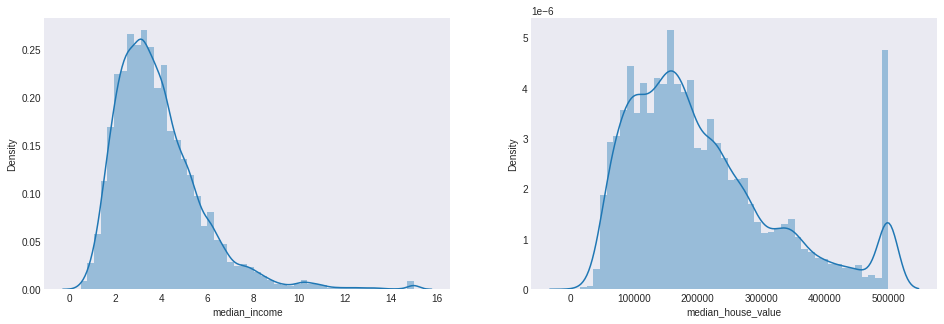

In [1127]:
PP.figure(figsize=(16,5))
PP.subplot(1,2,1)
S.distplot(T['median_income'])
PP.subplot(1,2,2)
S.distplot(T['median_house_value'])
PP.show()

/nix/store/3a6ardk55mlcynrs7hn4l4vynbm6wp7w-python3-3.9.10-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/nix/store/3a6ardk55mlcynrs7hn4l4vynbm6wp7w-python3-3.9.10-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


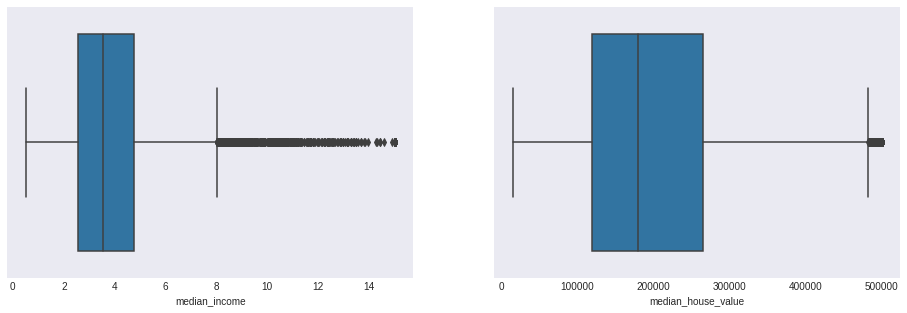

In [1129]:
PP.figure(figsize=(16,5))
PP.subplot(1,2,1)
S.boxplot(T['median_income'])
PP.subplot(1,2,2)
S.boxplot(T['median_house_value'])
PP.show()
